# STEP 1 : RECORD your PODCAST

In [3]:
# FIND DEVICE INDEX FOR RECORDING
import sounddevice as sd

# Query and print all audio devices
devices = sd.query_devices()
for idx, device in enumerate(devices):
    print(f"Index: {idx}, Device Name: {device['name']}")

YOUR_FOCUSRITE_DEVICE_INDEX = 2  # Replace with your Focusrite index


Index: 0, Device Name: DELL U2415
Index: 1, Device Name: Yeriko’s iPhone Microphone
Index: 2, Device Name: Scarlett 2i2 USB
Index: 3, Device Name: MacBook Air Microphone
Index: 4, Device Name: MacBook Air Speakers
Index: 5, Device Name: rekordbox Aggregate Device


### one channel record

In [4]:
# ------------------------- one channel
# import sounddevice as sd
# import numpy as np
# import wavio

# # Parameters
# RATE = 44100    # samples per second
# CHANNELS = 1    # Changed from 2 to 1
# DTYPE = np.int16
# FILENAME = "voice_recording.wav"
# SECONDS = 60*10  # Duration of recording

# # Record audio
# print("Recording...")
# audio_data = sd.rec(int(SECONDS * RATE), samplerate=RATE, channels=CHANNELS, dtype=DTYPE)
# sd.wait()  # Wait until recording is finished
# print("Recording done!")

# # Save as WAV file
# wavio.write(FILENAME, audio_data, RATE, sampwidth=2)

# # Playback
# print("Playing back...")
# sd.play(audio_data, RATE)
# sd.wait()
# print("Playback finished!")


### two channel recording

In [68]:
import sounddevice as sd
import numpy as np
import wavio

# List all devices and find your Focusrite index
print(sd.query_devices())

# Replace this index with your Focusrite device index

# Parameters
RATE = 44100  # samples per second
CHANNELS = 2  # Make sure to use the correct number of channels supported by your device
DTYPE = np.int16
FILENAME = f"_pod_1_recording/voice_recording"  # Ensuring {direc}/name for locations
SECONDS = 110  # Duration of recording

# Record audio
print("Recording...")
try:
    audio_data = sd.rec(int(SECONDS * RATE), samplerate=RATE, channels=CHANNELS, dtype=DTYPE, device=DEVICE_INDEX)
    sd.wait()  # Wait until recording is finished
    print("Recording done!")

    # Save as WAV file
    wavio.write(FILENAME, audio_data, RATE, sampwidth=2)

    # Playback
    print("Playing back...")
    sd.play(audio_data, RATE, device=DEVICE_INDEX)
    sd.wait()
    print("Playback finished!")
except Exception as e:
    print(f"An error occurred: {e}")


  0 DELL U2415, Core Audio (0 in, 2 out)
  1 Yeriko’s iPhone Microphone, Core Audio (1 in, 0 out)
  2 Scarlett 2i2 USB, Core Audio (2 in, 2 out)
< 3 External Headphones, Core Audio (0 in, 2 out)
> 4 MacBook Air Microphone, Core Audio (1 in, 0 out)
  5 MacBook Air Speakers, Core Audio (0 in, 2 out)
  6 rekordbox Aggregate Device, Core Audio (0 in, 2 out)
Recording...
Recording done!
Playing back...
Playback finished!


In [9]:
import sounddevice as sd
import numpy as np
import wavio
import time
import sys  # For the progress bar

# List all devices and find your Focusrite index
print(sd.query_devices())

# Replace this index with your Focusrite device index
DEVICE_INDEX = YOUR_FOCUSRITE_DEVICE_INDEX  # Replace this

# Parameters
RATE = 44100  # samples per second
CHANNELS = 2  # Make sure to use the correct number of channels supported by your device
DTYPE = np.int16
FILENAME = f"_pod_1_recording/voice_recording.wav"  # Ensuring {direc}/name for locations
SECONDS = 10  # Duration of recording

# 5-Second Countdown
for i in range(5, 0, -1):
    print(f"\nRecording starts in {i} seconds.")
    time.sleep(1)

# Initialize recording and progress bar
print("Recording...\n")
audio_data = sd.rec(int(SECONDS * RATE), samplerate=RATE, channels=CHANNELS, dtype=DTYPE, device=DEVICE_INDEX)

# Progress bar for recording duration
for i in range(SECONDS):
    sys.stdout.write(f"\rProgress: [{'=' * i}{' ' * (SECONDS - i - 1)}] {i+1}/{SECONDS} seconds")
    sys.stdout.flush()
    time.sleep(1)

# Finish recording and progress bar
sd.wait()
print("\nRecording done!")

# Save as WAV file
wavio.write(FILENAME, audio_data, RATE, sampwidth=2)

# Playback
# print("Playing back...")
# sd.play(audio_data, RATE, device=DEVICE_INDEX)
# sd.wait()
# print("Playback finished!")


  0 DELL U2415, Core Audio (0 in, 2 out)
  1 Yeriko’s iPhone Microphone, Core Audio (1 in, 0 out)
  2 Scarlett 2i2 USB, Core Audio (2 in, 2 out)
> 3 MacBook Air Microphone, Core Audio (1 in, 0 out)
< 4 MacBook Air Speakers, Core Audio (0 in, 2 out)
  5 rekordbox Aggregate Device, Core Audio (0 in, 2 out)

Recording starts in 5 seconds.

Recording starts in 4 seconds.

Recording starts in 3 seconds.

Recording starts in 2 seconds.

Recording starts in 1 seconds.
Recording...

Progress: [=========] 10/10 seconds
Recording done!
Playing back...
Playback finished!


In [10]:
# # PLAY AUDIO
# sd.play(audio_data, RATE, device=DEVICE_INDEX)
# sd.wait()

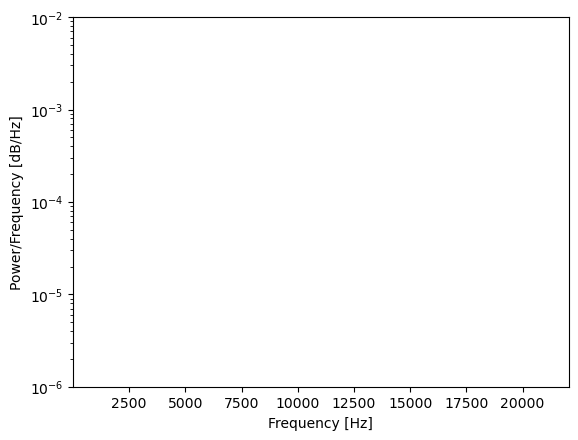

In [11]:
import wavio
import matplotlib.pyplot as plt
import numpy as np

def plot_frequency_from_file(file_path):
    # Read WAV file
    wav_obj = wavio.read(file_path)
    audio_data = wav_obj.data[:, 0]  # Taking one channel
    RATE = wav_obj.rate

    # Perform FFT and get frequencies and their corresponding power
    f, Pxx = np.fft.fftfreq(audio_data.shape[0], 1/RATE), np.abs(np.fft.fft(audio_data))

    # Plotting
    plt.figure()
    plt.semilogy(f[f > 0], Pxx[f > 0])
    plt.xlim([f[1], RATE // 2])
    plt.ylim([1e-6, 1e-2])
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power/Frequency [dB/Hz]')
    plt.show()

# Example usage
plot_frequency_from_file("_pod_1_recording/voice_recording.wav")


In [24]:
# STEP 2 : AUDIO EDITING - Quality 1a

In [2]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

def record_and_plot(SECONDS, RATE=44100, CHANNELS=2, DTYPE=np.int16, DEVICE_INDEX=None):
    # Initialize recording
    audio_data = np.zeros((SECONDS * RATE, CHANNELS), dtype=DTYPE)
    stream = sd.InputStream(samplerate=RATE, channels=CHANNELS, dtype=DTYPE, device=DEVICE_INDEX)
    plt.ion()  # Enable interactive mode
    fig, ax = plt.subplots()
    
    with stream:
        for i in range(SECONDS):
            audio_chunk, overflowed = stream.read(RATE)
            audio_data[i * RATE: (i + 1) * RATE] = audio_chunk
            
            # Calculate and plot the frequency spectrum in real-time
            f, Pxx = np.fft.fftfreq(audio_chunk.shape[0], 1/RATE), np.abs(np.fft.fft(audio_chunk[:, 0]))
            ax.clear()
            ax.semilogy(f[f > 0], Pxx[f > 0])
            ax.set_xlim([f[1], RATE // 2])
            ax.set_ylim([1e-6, 1e-2])
            ax.set_xlabel('Frequency [Hz]')
            ax.set_ylabel('Power/Frequency [dB/Hz]')
            plt.pause(0.01)
            
    print("Recording done!")

# Parameters
SECONDS = 5  # Duration of recording
RATE = 44100  # samples per second
CHANNELS = 2  # Make sure to use the correct number of channels supported by your device
DTYPE = np.int16
DEVICE_INDEX = None  # Replace this with your device index if needed

# Record and plot
record_and_plot(SECONDS, RATE, CHANNELS, DTYPE, DEVICE_INDEX)


PortAudioError: Error opening InputStream: Invalid number of channels [PaErrorCode -9998]